# Pandas: Groupby

`groupby` is an amazingly powerful function in pandas. But it is also complicated to use and understand.
The point of this lesson is to make you feel confident in using `groupby` and its cousins, `resample` and `rolling`. 

These notes are loosely based on the [Pandas GroupBy Documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html).

The "split/apply/combine" concept was first introduced in a paper by Hadley Wickham: <https://www.jstatsoft.org/article/view/v040i01>.


Imports:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
%matplotlib inline
import pandas as pd

First we read the Earthquake data from our previous assignment:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/earth-DS-ML/summer_2025/refs/heads/main/lectures_DS/data/usgs_earthquakes_2025.csv', parse_dates=['time'], index_col='id')
df['country'] = df.place.str.split(', ').str[-1]
df_small = df[df.mag<4]
df = df[df.mag>4]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country
id,,,,,,,,,,,,,,,,,,,,,
us6000qkt1,2025-06-17 12:00:22.773000+00:00,-23.1645,-175.3549,10.000,4.9,mb,22.0,166.0,6.481,0.49,...,"206 km SSW of ‘Ohonua, Tonga",earthquake,15.85,1.938,0.093,36.0,reviewed,us,us,Tonga
us6000qksf,2025-06-17 09:16:30.483000+00:00,-23.1181,-174.9129,10.000,4.8,mb,16.0,111.0,6.151,0.48,...,"196 km S of ‘Ohonua, Tonga",earthquake,14.94,1.939,0.148,14.0,reviewed,us,us,Tonga
us6000qks2,2025-06-17 08:36:22.986000+00:00,8.2769,126.8035,34.840,5.3,mww,100.0,67.0,1.706,1.23,...,"42 km ENE of Barcelona, Philippines",earthquake,7.91,3.994,0.062,25.0,reviewed,us,us,Philippines
us6000qkrz,2025-06-17 08:13:19.239000+00:00,50.6542,156.7597,91.831,4.7,mb,55.0,152.0,2.526,0.64,...,"44 km E of Severo-Kuril’sk, Russia",earthquake,10.38,7.726,0.032,287.0,reviewed,us,us,Russia
us6000qks0,2025-06-17 08:12:55.629000+00:00,-32.8812,-13.2948,10.000,5.0,mb,44.0,59.0,4.254,0.91,...,southern Mid-Atlantic Ridge,earthquake,10.55,1.837,0.076,55.0,reviewed,us,us,southern Mid-Atlantic Ridge


In [3]:
len(df)

5923

<Axes: xlabel='id'>

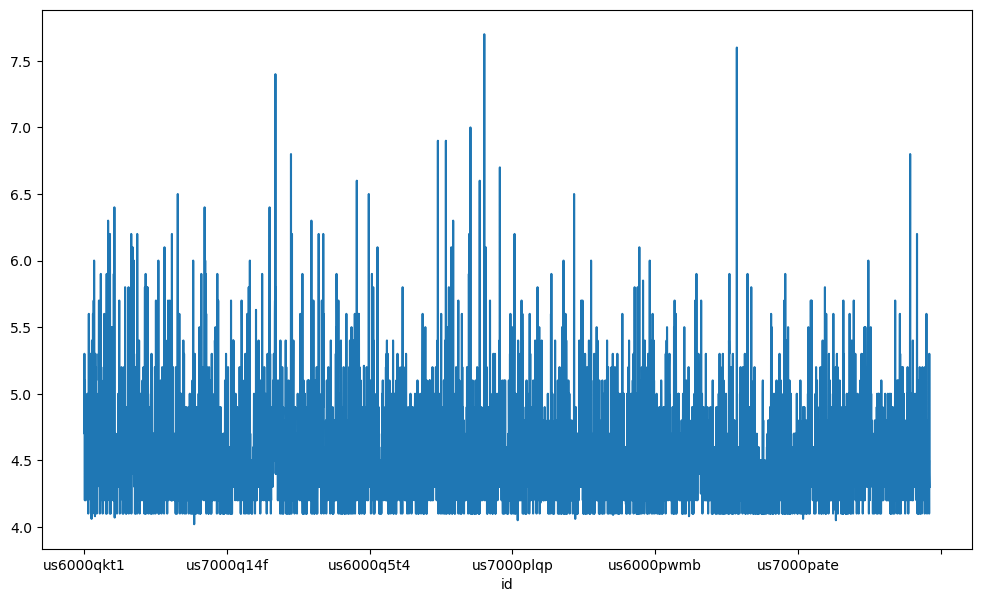

In [4]:
df.mag.plot()

<Axes: ylabel='Frequency'>

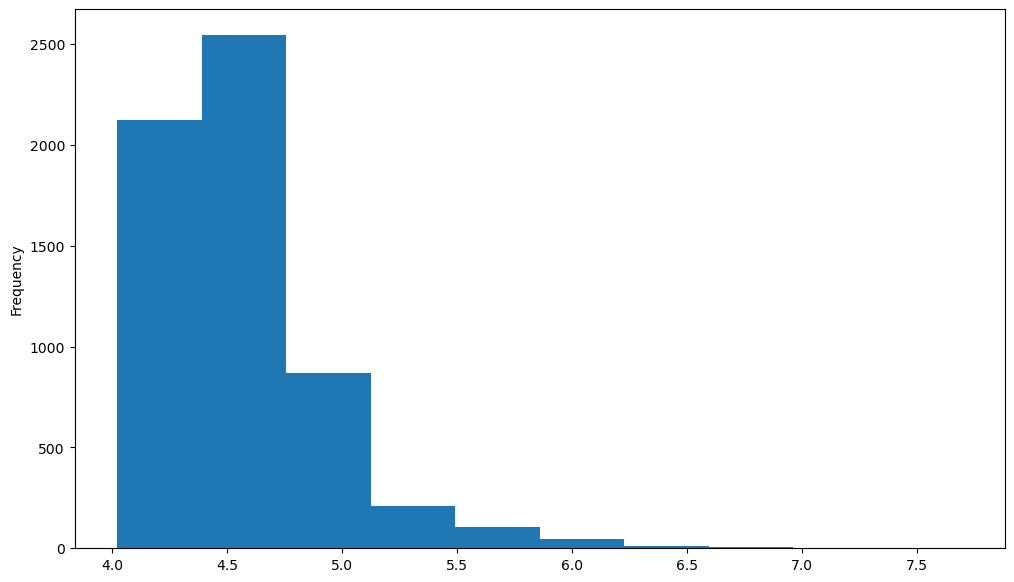

In [5]:
df.mag.plot.hist()

## An Example

This is an example of a "one-liner" that you can accomplish with groupby.

<Axes: xlabel='country'>

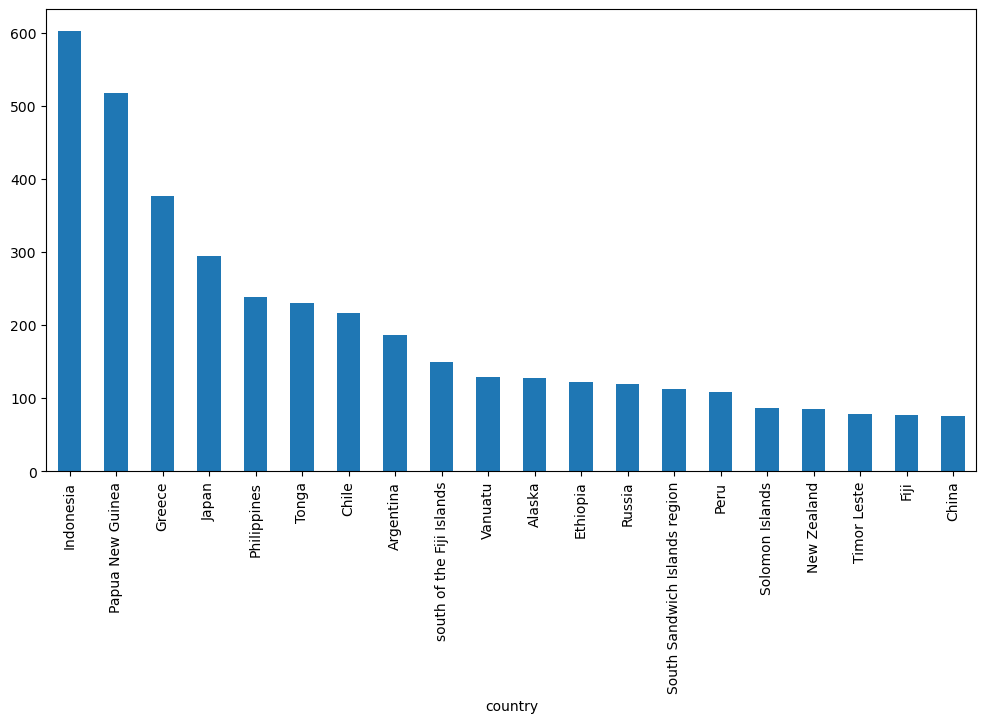

In [6]:
df.groupby('country').mag.count().nlargest(20).plot(kind='bar', figsize=(12,6))

<Axes: xlabel='country'>

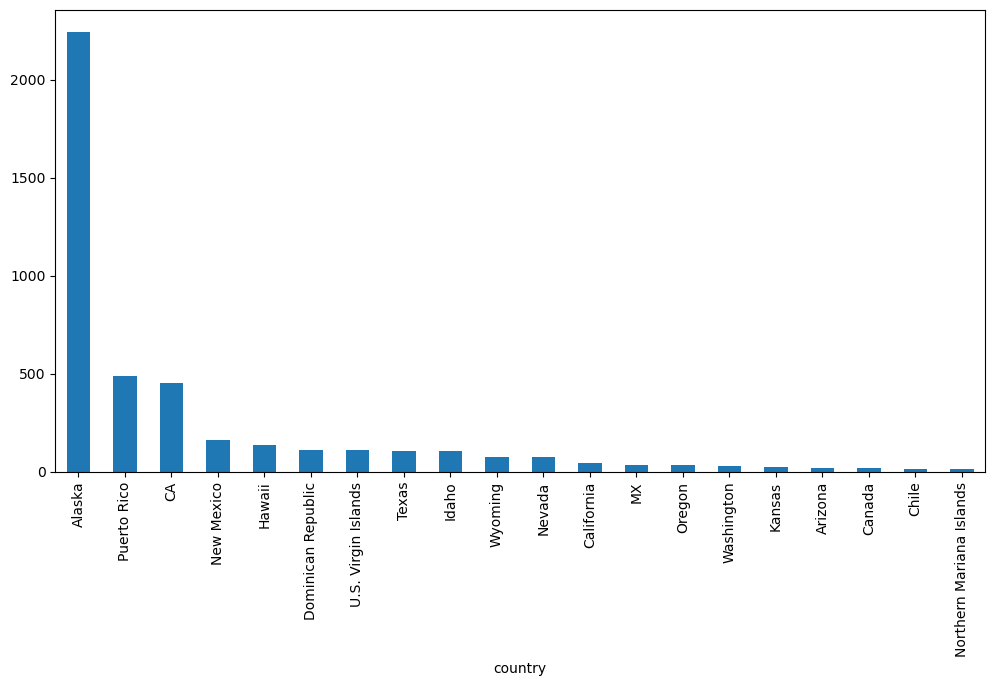

In [7]:
df_small.groupby('country').mag.count().nlargest(20).plot(kind='bar', figsize=(12,6))

## What Happened?

Let's break apart this operation a bit. The workflow with `groubpy` can be divided into three general steps:

1. **Split**: Partition the data into different groups based on some criterion.
1. **Apply**: Do some caclulation within each group. Different types of "apply" steps might be
  1. *Aggregation*: Get the mean or max within the group.
  1. *Transformation*: Normalize all the values within a group
  1. *Filtration*: Eliminate some groups based on a criterion.
1. **Combine**: Put the results back together into a single object.

![split-apply-combine](https://miro.medium.com/max/1840/1*JbF6nhrQsn4f-TaSF6IR9g.png)

### The `groupby` method

Both `Series` and `DataFrame` objects have a groupby method. It accepts a variety of arguments, but the simplest way to think about it is that you pass another series, whose unique values are used to split the original object into different groups.

via <https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99>

In [8]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country
id,,,,,,,,,,,,,,,,,,,,,
us6000qkt1,2025-06-17 12:00:22.773000+00:00,-23.1645,-175.3549,10.000,4.9,mb,22.0,166.0,6.481,0.49,...,"206 km SSW of ‘Ohonua, Tonga",earthquake,15.85,1.938,0.093,36.0,reviewed,us,us,Tonga
us6000qksf,2025-06-17 09:16:30.483000+00:00,-23.1181,-174.9129,10.000,4.8,mb,16.0,111.0,6.151,0.48,...,"196 km S of ‘Ohonua, Tonga",earthquake,14.94,1.939,0.148,14.0,reviewed,us,us,Tonga
us6000qks2,2025-06-17 08:36:22.986000+00:00,8.2769,126.8035,34.840,5.3,mww,100.0,67.0,1.706,1.23,...,"42 km ENE of Barcelona, Philippines",earthquake,7.91,3.994,0.062,25.0,reviewed,us,us,Philippines
us6000qkrz,2025-06-17 08:13:19.239000+00:00,50.6542,156.7597,91.831,4.7,mb,55.0,152.0,2.526,0.64,...,"44 km E of Severo-Kuril’sk, Russia",earthquake,10.38,7.726,0.032,287.0,reviewed,us,us,Russia
us6000qks0,2025-06-17 08:12:55.629000+00:00,-32.8812,-13.2948,10.000,5.0,mb,44.0,59.0,4.254,0.91,...,southern Mid-Atlantic Ridge,earthquake,10.55,1.837,0.076,55.0,reviewed,us,us,southern Mid-Atlantic Ridge


In [9]:
df.country

id
us6000qkt1                            Tonga
us6000qksf                            Tonga
us6000qks2                      Philippines
us6000qkrz                           Russia
us6000qks0      southern Mid-Atlantic Ridge
                          ...              
us6000pll8                         Ethiopia
us6000pj3b                            Libya
us6000pj2q                            Tonga
us6000pll7    south of the Kermadec Islands
us6000plld                         Ethiopia
Name: country, Length: 5923, dtype: object

In [10]:
df.groupby(df.country)

There is a shortcut for doing this with dataframes: you just pass the column name:

In [11]:
df.groupby('country')

### The `GroubBy` object

When we call, `groupby` we get back a `GroupBy` object:

In [12]:
gb = df.groupby('country')
gb

The length tells us how many groups were found:

In [13]:
len(gb)

194

All of the groups are available as a dictionary via the `.groups` attribute:

In [15]:
groups = gb.groups
len(groups)

194

In [16]:
groups.keys()

dict_keys(['2025 Drake Passage Earthquake', 'Afghanistan', 'Alaska', 'Algeria', 'Anguilla', 'Antigua and Barbuda', 'Arctic Ocean', 'Argentina', 'Armenia', 'Ascension Island region', 'Australia', 'Azerbaijan', 'Azores Islands region', 'Bahamas', 'Balleny Islands region', 'Banda Sea', 'Barbados', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Burma', 'Burma (Myanmar)', 'Burma (Myanmar) Earthquake', 'CA', 'Canada', 'Carlsberg Ridge', 'Cayman Islands', 'Chad', 'Chagos Archipelago region', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Democratic Republic of the Congo', 'Dominica', 'Dominican Republic', 'Drake Passage', 'Easter Island region', 'Ecuador', 'Ecuador region', 'El Salvador', 'Eritrea', 'Ethiopia', 'Federated States of Micronesia', 'Federated States of Micronesia region', 'Fiji', 'Fiji region', 'Georgia', 'Greece', 'Greenland Sea', 'Guadeloupe', 'Guam', 'Guatemala', 'Hawaii', 'Honduras', 'Iceland', 'Iceland region', 'Idaho', 'India', 'India region', 'Indian Ocean Triple

In [17]:
list(groups.keys())

['2025 Drake Passage Earthquake',
 'Afghanistan',
 'Alaska',
 'Algeria',
 'Anguilla',
 'Antigua and Barbuda',
 'Arctic Ocean',
 'Argentina',
 'Armenia',
 'Ascension Island region',
 'Australia',
 'Azerbaijan',
 'Azores Islands region',
 'Bahamas',
 'Balleny Islands region',
 'Banda Sea',
 'Barbados',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Burma',
 'Burma (Myanmar)',
 'Burma (Myanmar) Earthquake',
 'CA',
 'Canada',
 'Carlsberg Ridge',
 'Cayman Islands',
 'Chad',
 'Chagos Archipelago region',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Democratic Republic of the Congo',
 'Dominica',
 'Dominican Republic',
 'Drake Passage',
 'Easter Island region',
 'Ecuador',
 'Ecuador region',
 'El Salvador',
 'Eritrea',
 'Ethiopia',
 'Federated States of Micronesia',
 'Federated States of Micronesia region',
 'Fiji',
 'Fiji region',
 'Georgia',
 'Greece',
 'Greenland Sea',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Hawaii',
 'Honduras',
 'Iceland',
 'Iceland region',
 'Idaho

### Iterating and selecting groups

You can loop through the groups if you want.

In [18]:
a = [1,2,3]

In [19]:
a

[1, 2, 3]

In [20]:
a[0]

1

In [21]:
b = {'key1': 1, 'key2':2, 'key3':4
    }

In [22]:
b

{'key1': 1, 'key2': 2, 'key3': 4}

In [23]:
b['key1']

1

In [24]:
groups['south of Africa']

Index(['us6000qjkh', 'us7000pp10', 'us6000pzrv', 'us6000pzl1', 'us6000pvw6'], dtype='object', name='id')

In [25]:
groups['Afghanistan']

Index(['us6000qkkm', 'us6000qjhm', 'us6000qiif', 'us6000qhyi', 'us6000qh0s',
       'us7000q1by', 'us7000q0z5', 'us7000q0aw', 'us7000q05h', 'us7000pzz5',
       'us7000pyne', 'us7000pydu', 'us7000px78', 'us7000pwle', 'us7000pve9',
       'us7000pvcr', 'us7000pv82', 'us7000pv7x', 'us7000pv02', 'us6000q76g',
       'us6000q6fr', 'us7000pw58', 'us6000q6c3', 'us7000ppcq', 'us7000pni6',
       'us7000pni0', 'us7000pne1', 'us7000pn0e', 'us7000pmym', 'us7000plhv',
       'us7000plec', 'us6000pzkp', 'us6000pxul', 'us6000pwru', 'us6000pxge',
       'us6000pvsk', 'us7000pflg', 'us7000pfcc', 'us7000pfc9', 'us7000pefx',
       'us7000pd3k', 'us7000pchv', 'us7000pb68', 'us7000pb30', 'us6000pmd7',
       'us6000plpp', 'us6000pk88', 'us6000pk23', 'us6000pjtx', 'us6000pjpy',
       'us6000pjlp'],
      dtype='object', name='id')

In [26]:
for key, group in gb:
    display(group.head())
    print(f'The key is "{key}"')
    break

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country
id,,,,,,,,,,,,,,,,,,,,,
us7000pwkn,2025-05-02 12:58:26.014000+00:00,-56.8094,-68.1019,10.0,7.4,mww,284.0,20.0,1.9,0.75,...,2025 Drake Passage Earthquake,earthquake,7.58,1.441,0.038,68.0,reviewed,us,us,2025 Drake Passage Earthquake


The key is "2025 Drake Passage Earthquake"


In [27]:
n = 0
for key, group in gb:
    display(group.head())
    print(f'The key is "{key}"')
    n= n+1
    if n>2:
        break

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country
id,,,,,,,,,,,,,,,,,,,,,
us7000pwkn,2025-05-02 12:58:26.014000+00:00,-56.8094,-68.1019,10.0,7.4,mww,284.0,20.0,1.9,0.75,...,2025 Drake Passage Earthquake,earthquake,7.58,1.441,0.038,68.0,reviewed,us,us,2025 Drake Passage Earthquake


The key is "2025 Drake Passage Earthquake"


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country
id,,,,,,,,,,,,,,,,,,,,,
us6000qkkm,2025-06-16 10:34:13.071000+00:00,36.5269,70.2915,197.467,4.4,mb,38.0,89.0,2.218,0.85,...,"39 km E of Farkhār, Afghanistan",earthquake,7.68,9.861,0.130,17.0,reviewed,us,us,Afghanistan
us6000qjhm,2025-06-11 04:45:23.745000+00:00,36.5328,70.6591,215.471,4.4,mb,72.0,139.0,2.295,0.88,...,"40 km SSW of Jurm, Afghanistan",earthquake,9.25,7.628,0.058,85.0,reviewed,us,us,Afghanistan
us6000qiif,2025-06-06 19:26:58.547000+00:00,36.6295,68.0963,37.077,4.3,mb,69.0,124.0,2.192,0.57,...,"36 km ESE of Khulm, Afghanistan",earthquake,8.13,9.473,0.068,61.0,reviewed,us,us,Afghanistan
us6000qhyi,2025-06-04 19:29:30.379000+00:00,36.5033,71.1492,229.220,4.2,mb,69.0,79.0,2.096,0.80,...,"39 km WSW of Ashkāsham, Afghanistan",earthquake,7.97,7.099,0.083,41.0,reviewed,us,us,Afghanistan
us6000qh0s,2025-05-31 02:45:35.975000+00:00,35.8044,71.1038,83.711,4.3,mb,31.0,98.0,2.063,1.28,...,"45 km NNE of Pārūn, Afghanistan",earthquake,8.31,7.823,0.154,12.0,reviewed,us,us,Afghanistan


The key is "Afghanistan"


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country
id,,,,,,,,,,,,,,,,,,,,,
ak0257l477bi,2025-06-14 14:32:06.018000+00:00,65.7762,-145.7213,10.800,4.7,ml,NaN,NaN,NaN,0.80,...,"47 km WNW of Central, Alaska",earthquake,NaN,0.200,NaN,NaN,reviewed,ak,ak,Alaska
ak0257jjjt29,2025-06-13 19:17:06.365000+00:00,60.1166,-153.4203,159.700,4.2,ml,NaN,NaN,NaN,0.67,...,"50 km E of Port Alsworth, Alaska",earthquake,NaN,0.300,NaN,NaN,reviewed,ak,ak,Alaska
us6000qjn2,2025-06-11 20:36:16.744000+00:00,51.3129,-176.2917,27.118,4.7,mb,61.0,177.0,0.761,1.07,...,"66 km SSE of Adak, Alaska",earthquake,6.3,6.568,0.039,206.0,reviewed,us,us,Alaska
ak0257egu4bq,2025-06-10 12:28:19.795000+00:00,61.9075,-150.9539,15.200,4.1,ml,NaN,NaN,NaN,0.93,...,"25 km ESE of Skwentna, Alaska",earthquake,NaN,0.100,NaN,NaN,reviewed,ak,ak,Alaska
us6000qim5,2025-06-07 04:00:30.558000+00:00,51.6019,-171.8916,35.000,4.3,mb,52.0,180.0,1.550,0.95,...,"172 km ESE of Atka, Alaska",earthquake,8.9,1.974,0.047,127.0,reviewed,us,us,Alaska


The key is "Alaska"


And you can get a specific group by key.

In [28]:
gb.get_group('Chile').head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country
id,,,,,,,,,,,,,,,,,,,,,
us6000qkjt,2025-06-16 08:19:27.151000+00:00,-22.5784,-67.9279,172.967,4.4,mb,41.0,49.0,0.438,0.61,...,"46 km NE of San Pedro de Atacama, Chile",earthquake,5.71,7.666,0.099,29.0,reviewed,us,us,Chile
us6000qkhr,2025-06-16 00:51:17.310000+00:00,-20.3278,-70.2485,41.960,4.4,mb,19.0,172.0,1.007,0.56,...,"13 km WSW of La Tirana, Chile",earthquake,4.55,10.951,0.309,3.0,reviewed,us,us,Chile
us6000qkfl,2025-06-15 13:30:08.837000+00:00,-22.3399,-68.6815,117.138,4.3,mb,28.0,46.0,0.750,1.13,...,"28 km ENE of Calama, Chile",earthquake,4.22,6.238,0.154,14.0,reviewed,us,us,Chile
us6000qjpw,2025-06-11 23:53:41.988000+00:00,-21.6724,-69.1225,98.543,4.1,mb,14.0,88.0,0.166,0.71,...,"89 km NNW of Calama, Chile",earthquake,7.11,10.366,0.234,5.0,reviewed,us,us,Chile
us6000qj2v,2025-06-09 00:59:17.293000+00:00,-32.2490,-71.0761,83.965,4.1,mb,28.0,131.0,0.222,0.19,...,"26 km NNE of La Ligua, Chile",earthquake,4.23,6.102,0.198,7.0,reviewed,us,us,Chile


In [29]:
gb.get_group('Afghanistan').head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country
id,,,,,,,,,,,,,,,,,,,,,
us6000qkkm,2025-06-16 10:34:13.071000+00:00,36.5269,70.2915,197.467,4.4,mb,38.0,89.0,2.218,0.85,...,"39 km E of Farkhār, Afghanistan",earthquake,7.68,9.861,0.130,17.0,reviewed,us,us,Afghanistan
us6000qjhm,2025-06-11 04:45:23.745000+00:00,36.5328,70.6591,215.471,4.4,mb,72.0,139.0,2.295,0.88,...,"40 km SSW of Jurm, Afghanistan",earthquake,9.25,7.628,0.058,85.0,reviewed,us,us,Afghanistan
us6000qiif,2025-06-06 19:26:58.547000+00:00,36.6295,68.0963,37.077,4.3,mb,69.0,124.0,2.192,0.57,...,"36 km ESE of Khulm, Afghanistan",earthquake,8.13,9.473,0.068,61.0,reviewed,us,us,Afghanistan
us6000qhyi,2025-06-04 19:29:30.379000+00:00,36.5033,71.1492,229.220,4.2,mb,69.0,79.0,2.096,0.80,...,"39 km WSW of Ashkāsham, Afghanistan",earthquake,7.97,7.099,0.083,41.0,reviewed,us,us,Afghanistan
us6000qh0s,2025-05-31 02:45:35.975000+00:00,35.8044,71.1038,83.711,4.3,mb,31.0,98.0,2.063,1.28,...,"45 km NNE of Pārūn, Afghanistan",earthquake,8.31,7.823,0.154,12.0,reviewed,us,us,Afghanistan


## Aggregation

Now that we know how to create a `GroupBy` object, let's learn how to do aggregation on it.

One way us to use the `.aggregate` method, which accepts another function as its argument. The result is automatically combined into a new dataframe with the group key as the index.

In [30]:
gb.aggregate(np.max).head()

/tmp/ipykernel_6529/2808193076.py:1: FutureWarning: The provided callable <function max at 0x7daf3a13f920> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  gb.aggregate(np.max).head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
country,,,,,,,,,,,,,,,,,,,,,
2025 Drake Passage Earthquake,2025-05-02 12:58:26.014000+00:00,-56.8094,-68.1019,10.000,7.4,mww,284.0,20.0,1.900,0.75,...,2025-06-06T12:21:50.736Z,2025 Drake Passage Earthquake,earthquake,7.58,1.441,0.038,68.0,reviewed,us,us
Afghanistan,2025-06-16 10:34:13.071000+00:00,37.4414,72.3551,230.241,5.7,mww,178.0,246.0,2.983,1.28,...,2025-06-16T11:33:01.040Z,"80 km SSE of Farkhār, Afghanistan",earthquake,11.79,13.714,0.235,154.0,reviewed,us,us
Alaska,2025-06-14 14:32:06.018000+00:00,67.8223,178.6746,205.536,6.2,mww,287.0,219.0,2.579,1.37,...,2025-06-17T12:05:18.488Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,11.37,13.318,0.197,715.0,reviewed,us,us
Algeria,2025-03-18 09:50:26.946000+00:00,36.4349,3.4384,10.000,4.8,mww,167.0,55.0,3.516,0.51,...,2025-05-17T19:20:00.040Z,"19 km SW of Lakhdaria, Algeria",earthquake,7.35,1.800,0.083,14.0,reviewed,us,us
Anguilla,2025-05-27 02:55:33.363000+00:00,19.3269,-63.1485,94.968,4.5,mb,75.0,138.0,1.427,0.72,...,2025-06-06T21:12:26.040Z,"52 km NNW of Sandy Ground Village, Anguilla",earthquake,6.88,8.063,0.124,44.0,reviewed,us,us


By default, the operation is applied to every column. That's usually not what we want. We can use both `.` or `[]` syntax to select a specific column to operate on. Then we get back a series.

In [31]:
gb

In [32]:
gb.mag

In [33]:
gb.mag.aggregate(np.max)

/tmp/ipykernel_6529/2229133186.py:1: FutureWarning: The provided callable <function max at 0x7daf3a13f920> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  gb.mag.aggregate(np.max)


country
2025 Drake Passage Earthquake     7.4
Afghanistan                       5.7
Alaska                            6.2
Algeria                           4.8
Anguilla                          4.5
                                 ... 
west of Macquarie Island          6.1
west of Vancouver Island          4.2
west of the Galapagos Islands     5.3
western Indian-Antarctic Ridge    6.2
western Xizang                    5.3
Name: mag, Length: 194, dtype: float64

In [34]:
gb.mag.aggregate(np.sum)

/tmp/ipykernel_6529/2970731060.py:1: FutureWarning: The provided callable <function sum at 0x7daf3a13ef20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  gb.mag.aggregate(np.sum)


country
2025 Drake Passage Earthquake       7.4
Afghanistan                       221.7
Alaska                            583.3
Algeria                             4.8
Anguilla                           13.1
                                  ...  
west of Macquarie Island           75.3
west of Vancouver Island            4.2
west of the Galapagos Islands      46.1
western Indian-Antarctic Ridge    137.5
western Xizang                     40.5
Name: mag, Length: 194, dtype: float64

In [35]:
gb.mag.aggregate(np.mean)

/tmp/ipykernel_6529/480462825.py:1: FutureWarning: The provided callable <function mean at 0x7daf3a160360> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gb.mag.aggregate(np.mean)


country
2025 Drake Passage Earthquake     7.400000
Afghanistan                       4.347059
Alaska                            4.557031
Algeria                           4.800000
Anguilla                          4.366667
                                    ...   
west of Macquarie Island          4.706250
west of Vancouver Island          4.200000
west of the Galapagos Islands     4.610000
western Indian-Antarctic Ridge    4.741379
western Xizang                    4.500000
Name: mag, Length: 194, dtype: float64

In [36]:
gb.mag.aggregate(np.max).head()

/tmp/ipykernel_6529/2287653877.py:1: FutureWarning: The provided callable <function max at 0x7daf3a13f920> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  gb.mag.aggregate(np.max).head()


country
2025 Drake Passage Earthquake    7.4
Afghanistan                      5.7
Alaska                           6.2
Algeria                          4.8
Anguilla                         4.5
Name: mag, dtype: float64

In [37]:
gb.mag.aggregate(np.max).nlargest(10)

/tmp/ipykernel_6529/2071493650.py:1: FutureWarning: The provided callable <function max at 0x7daf3a13f920> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  gb.mag.aggregate(np.max).nlargest(10)


country
Burma (Myanmar) Earthquake       7.7
Cayman Islands                   7.6
2025 Drake Passage Earthquake    7.4
Tonga                            7.0
Papua New Guinea                 6.9
Reykjanes Ridge                  6.9
Japan                            6.8
Macquarie Island region          6.8
Burma (Myanmar)                  6.7
New Zealand                      6.7
Name: mag, dtype: float64

There are shortcuts for common aggregation functions:

In [38]:
gb.mag.max().nlargest(10)

country
Burma (Myanmar) Earthquake       7.7
Cayman Islands                   7.6
2025 Drake Passage Earthquake    7.4
Tonga                            7.0
Papua New Guinea                 6.9
Reykjanes Ridge                  6.9
Japan                            6.8
Macquarie Island region          6.8
Burma (Myanmar)                  6.7
New Zealand                      6.7
Name: mag, dtype: float64

In [39]:
gb.mag.min().nsmallest(10)

country
Puerto Rico            4.02
U.S. Virgin Islands    4.05
CA                     4.06
Dominican Republic     4.06
Afghanistan            4.10
Alaska                 4.10
Argentina              4.10
Australia              4.10
Bahamas                4.10
Bolivia                4.10
Name: mag, dtype: float64

In [40]:
gb.mag.mean().nlargest(10)

country
Burma (Myanmar) Earthquake            7.700000
2025 Drake Passage Earthquake         7.400000
Western Caribbean Sea                 5.400000
north of Franz Josef Land             5.300000
Macquarie Island region               5.233333
southeast central Pacific Ocean       5.200000
Morocco                               5.100000
Pacific-Antarctic Ridge               5.070588
South Atlantic Ocean                  5.050000
east of the South Sandwich Islands    5.000000
Name: mag, dtype: float64

In [41]:
gb.mag.std().nlargest(10)

country
Cayman Islands                    0.978713
U.S. Virgin Islands               0.909340
Macquarie Island region           0.895917
southwest of Africa               0.760263
Revilla Gigedo Islands region     0.726024
Svalbard and Jan Mayen            0.680241
India region                      0.643774
northwest of the Kuril Islands    0.643169
Panama                            0.621435
Reykjanes Ridge                   0.605769
Name: mag, dtype: float64

We can also apply multiple functions at once:

In [42]:
gb.mag.aggregate([np.min, np.max, np.mean]).head()

/tmp/ipykernel_6529/1381609224.py:1: FutureWarning: The provided callable <function min at 0x7daf3a13fa60> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  gb.mag.aggregate([np.min, np.max, np.mean]).head()
/tmp/ipykernel_6529/1381609224.py:1: FutureWarning: The provided callable <function max at 0x7daf3a13f920> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  gb.mag.aggregate([np.min, np.max, np.mean]).head()
/tmp/ipykernel_6529/1381609224.py:1: FutureWarning: The provided callable <function mean at 0x7daf3a160360> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gb.mag.aggregate([np.min, np.max, np.mean]).head()


,min,max,mean
country,,,
2025 Drake Passage Earthquake,7.4,7.4,7.400000
Afghanistan,4.1,5.7,4.347059
Alaska,4.1,6.2,4.557031
Algeria,4.8,4.8,4.800000
Anguilla,4.2,4.5,4.366667


/tmp/ipykernel_6529/3179219123.py:1: FutureWarning: The provided callable <function min at 0x7daf3a13fa60> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  gb.mag.aggregate([np.min, np.max, np.mean]).nlargest(10, 'mean').plot(kind='bar')
/tmp/ipykernel_6529/3179219123.py:1: FutureWarning: The provided callable <function max at 0x7daf3a13f920> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  gb.mag.aggregate([np.min, np.max, np.mean]).nlargest(10, 'mean').plot(kind='bar')
/tmp/ipykernel_6529/3179219123.py:1: FutureWarning: The provided callable <function mean at 0x7daf3a160360> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead

<Axes: xlabel='country'>

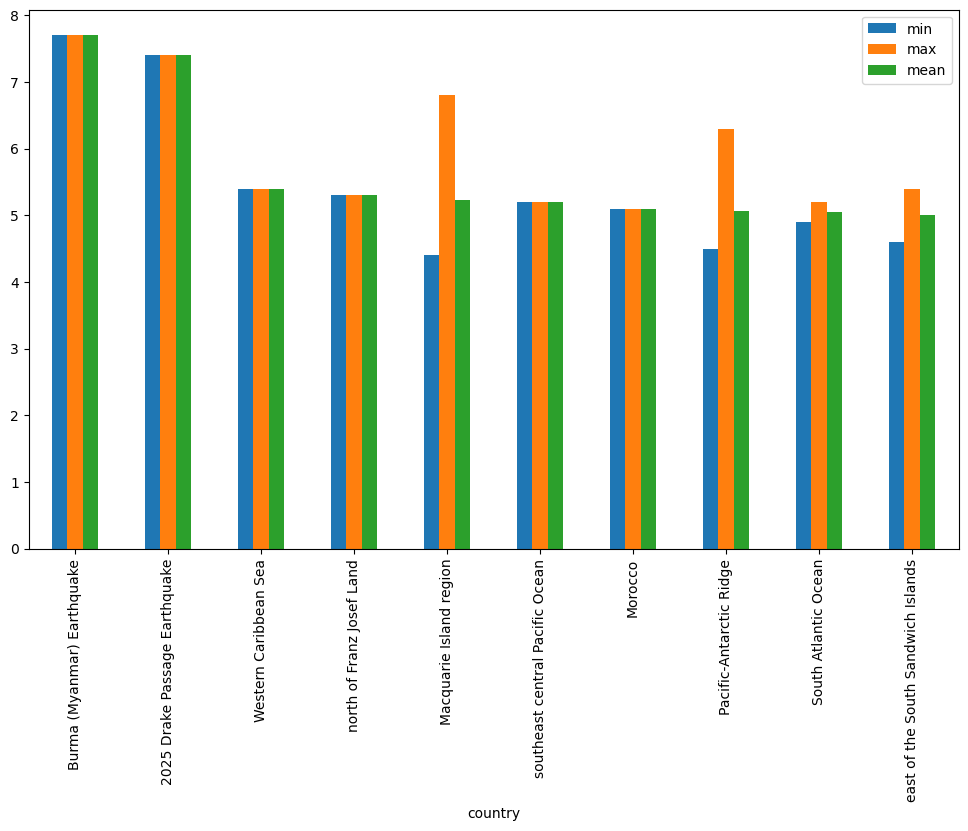

In [43]:
gb.mag.aggregate([np.min, np.max, np.mean]).nlargest(10, 'mean').plot(kind='bar')

## Transformation

The key difference between aggregation and transformation is that aggregation returns a *smaller* object than the original, indexed by the group keys, while *transformation* returns an object with the same index (and same size) as the original object. Groupby + transformation is used when applying an operation that requires information about the whole group.

In this example, we standardize the earthquakes in each country so that the distribution has zero mean and unit variance. We do this by first defining a function called `standardize` and then passing it to the `transform` method.

I admit that I don't know why you would want to do this. `transform` makes more sense to me in the context of time grouping operation. See below for another example.

In [44]:
def standardize(x):
    return (x - x.mean())/x.std()

mag_standardized_by_country = gb.mag.transform(standardize)
mag_standardized_by_country.head()

id
us6000qkt1    0.668464
us6000qksf    0.419407
us6000qks2    2.157996
us6000qkrz    0.642692
us6000qks0    0.909743
Name: mag, dtype: float64

## Time Grouping

We already saw how pandas has a strong built-in understanding of time. This capability is even more powerful in the context of `groupby`. With datasets indexed by a pandas `DateTimeIndex`, we can easily group and resample the data using common time units.

To get started, let's load the timeseries data we already explored in past lessons.

In [45]:
import urllib
import pandas as pd

header_url = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/HEADERS.txt'
with urllib.request.urlopen(header_url) as response:
    data = response.read().decode('utf-8')
lines = data.split('\n')
headers = lines[1].split(' ')

ftp_base = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/'
dframes = []
for year in range(2016, 2019):
    data_url = f'{year}/CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(ftp_base + data_url, parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6529/2092298281.py:15: SyntaxWarning: invalid escape sequence '\s'
  names=headers, header=None, sep='\s+',


In [46]:
df.head()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,64756,2.422,-73.74,41.79,3.4,-0.5,1.5,1.3,0.0,1.69,...,0.233,0.204,0.155,0.147,4.2,4.4,5.1,6.0,7.6,NaN
2016-01-02,64756,2.422,-73.74,41.79,2.9,-3.6,-0.4,-0.3,0.0,6.25,...,0.227,0.199,0.152,0.144,2.8,3.1,4.2,5.7,7.4,NaN
2016-01-03,64756,2.422,-73.74,41.79,5.1,-1.8,1.6,1.1,0.0,5.69,...,0.223,0.196,0.151,0.141,2.6,2.8,3.8,5.2,7.2,NaN
2016-01-04,64756,2.422,-73.74,41.79,0.5,-14.4,-6.9,-7.5,0.0,9.17,...,0.220,0.194,0.148,0.139,1.7,2.1,3.4,4.9,6.9,NaN
2016-01-05,64756,2.422,-73.74,41.79,-5.2,-15.5,-10.3,-11.7,0.0,9.34,...,0.213,0.191,0.148,0.138,0.4,0.9,2.4,4.3,6.6,NaN


This timeseries has daily resolution, and the daily plots are somewhat noisy.

<Axes: xlabel='LST_DATE'>

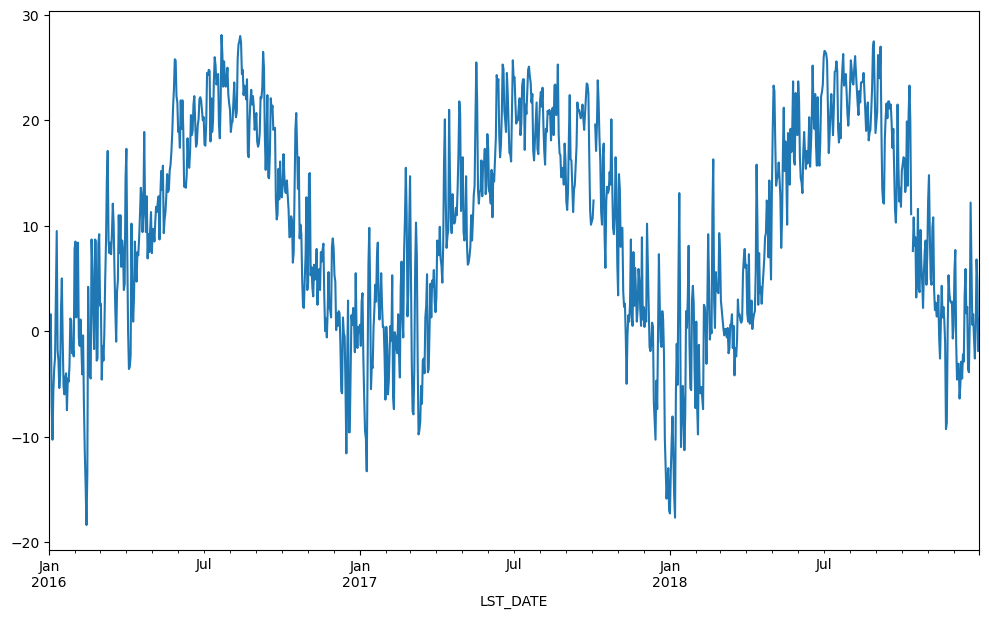

In [47]:
df.T_DAILY_MEAN.plot()

A common way to analyze such data in climate science is to create a "climatology," which contains the average values in each month or day of the year. We can do this easily with groupby. Recall that `df.index` is a pandas `DateTimeIndex` object.

In [48]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='LST_DATE', length=1096, freq=None)

In [49]:
df.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='LST_DATE', length=1096)

In [50]:
monthly_climatology = df.select_dtypes(include='number').groupby(df.index.month).mean()
monthly_climatology

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
1,64756.0,2.488667,-73.74,41.79,2.924731,-7.122581,-2.100000,-1.905376,2.478495,5.812258,...,0.240250,0.200698,0.153645,0.160859,0.150538,0.248387,0.788172,1.766667,3.364516,NaN
2,64756.0,2.487882,-73.74,41.79,6.431765,-5.015294,0.712941,1.022353,4.077647,8.495882,...,0.247714,0.210044,0.159153,0.163889,1.216471,1.169412,1.278824,1.617647,2.442353,NaN
3,64756.0,2.488667,-73.74,41.79,7.953763,-3.035484,2.455914,2.643011,2.788172,13.211290,...,0.228612,0.203634,0.157796,0.160366,3.450538,3.400000,3.372043,3.480645,3.777419,NaN
4,64756.0,2.488667,-73.74,41.79,14.793333,1.816667,8.302222,8.574444,2.396667,15.295889,...,0.214067,0.195844,0.153878,0.158100,9.415556,9.117778,8.455556,7.618889,6.670000,NaN
5,64756.0,2.488667,-73.74,41.79,21.235484,8.460215,14.850538,15.121505,3.015054,17.288602,...,0.204796,0.187097,0.148871,0.155720,16.934409,16.640860,15.612903,14.208602,12.455914,NaN
6,64756.0,2.488667,-73.74,41.79,25.627778,11.837778,18.733333,19.026667,3.053333,21.913333,...,0.136911,0.135211,0.129422,0.152711,22.403333,22.126667,20.956667,19.448889,17.552222,NaN
7,64756.0,2.488667,-73.74,41.79,28.568817,15.536559,22.054839,22.012903,3.865591,21.570645,...,0.105806,0.095204,0.114419,0.150000,25.448387,25.318280,24.163441,22.746237,21.068817,NaN
8,64756.0,2.488667,-73.74,41.79,27.473118,15.351613,21.410753,21.378495,4.480645,18.493333,...,0.156161,0.132333,0.128796,0.158750,24.758065,24.829032,24.116129,23.325806,22.301075,NaN
9,64756.0,2.488667,-73.74,41.79,24.084444,12.032222,18.057778,17.866667,3.730000,13.625667,...,0.136900,0.126422,0.121356,0.154000,21.028889,21.168889,20.921111,20.834444,20.707778,NaN


<Axes: xlabel='LST_DATE'>

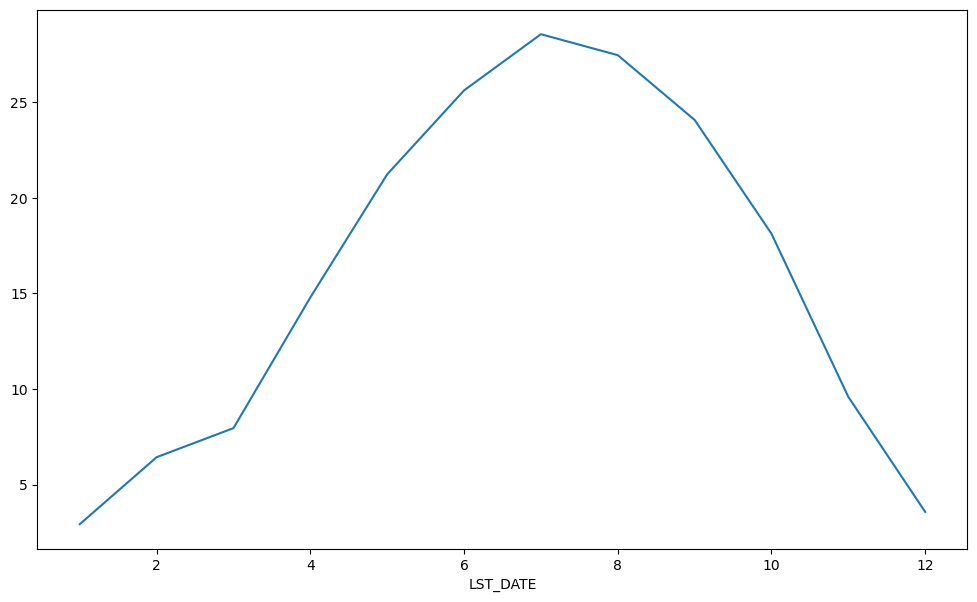

In [51]:
monthly_climatology.T_DAILY_MAX.plot()

Each row in this new dataframe respresents the average values for the months (1=January, 2=February, etc.)

We can apply more customized aggregations, as with any groupby operation. Below we keep the mean of the mean, max of the max, and min of the min for the temperature measurements.

In [52]:
monthly_T_climatology = df.groupby(df.index.month).aggregate({'T_DAILY_MEAN': 'mean',
                                                              'T_DAILY_MAX': 'max',
                                                              'T_DAILY_MIN': 'min'})
monthly_T_climatology

,T_DAILY_MEAN,T_DAILY_MAX,T_DAILY_MIN
LST_DATE,,,
1,-2.100000,16.9,-26.0
2,0.712941,24.9,-24.7
3,2.455914,26.8,-16.5
4,8.302222,30.6,-11.3
5,14.850538,33.4,-1.6
6,18.733333,33.8,3.4
7,22.054839,35.7,8.2
8,21.410753,34.5,6.0
9,18.057778,32.7,0.3


<Axes: xlabel='LST_DATE'>

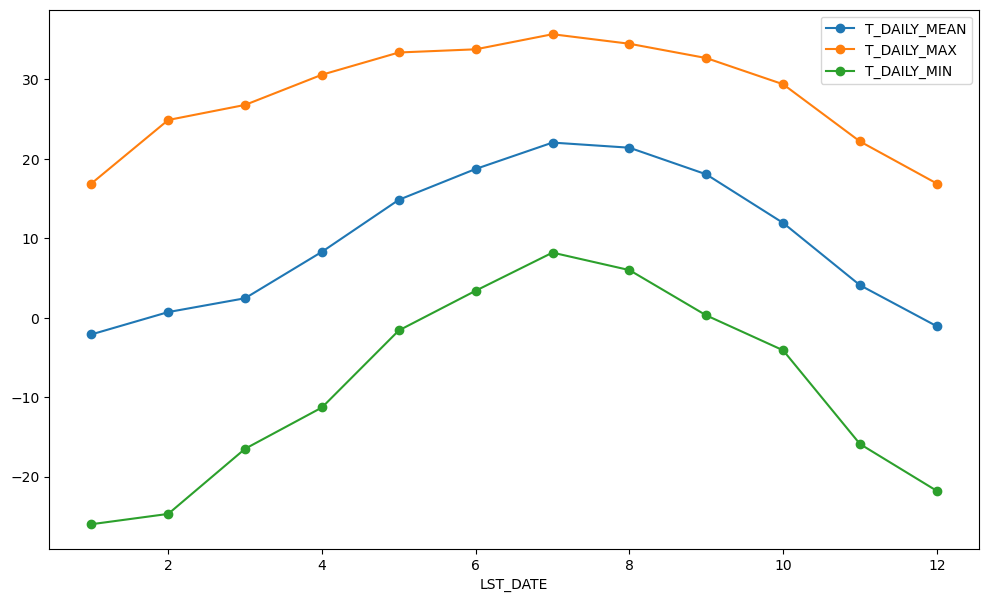

In [53]:
monthly_T_climatology.plot(marker='o')

If we want to do it on a finer scale, we can group by day of year.

<Axes: xlabel='LST_DATE'>

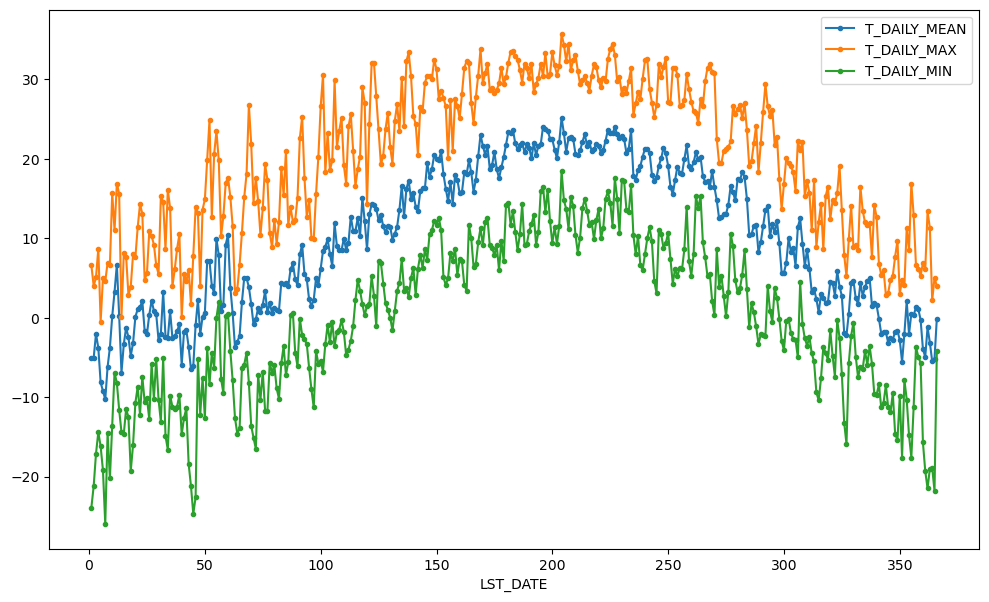

In [54]:
daily_T_climatology = df.groupby(df.index.dayofyear).aggregate({'T_DAILY_MEAN': 'mean',
                                                            'T_DAILY_MAX': 'max',
                                                            'T_DAILY_MIN': 'min'})
daily_T_climatology.plot(marker='.')

### Calculating anomalies

A common mode of analysis in climate science is to remove the climatology from a signal to focus only on the "anomaly" values. This can be accomplished with transformation.

In [55]:
df

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,64756,2.422,-73.74,41.79,3.4,-0.5,1.5,1.3,0.0,1.69,...,0.233,0.204,0.155,0.147,4.2,4.4,5.1,6.0,7.6,NaN
2016-01-02,64756,2.422,-73.74,41.79,2.9,-3.6,-0.4,-0.3,0.0,6.25,...,0.227,0.199,0.152,0.144,2.8,3.1,4.2,5.7,7.4,NaN
2016-01-03,64756,2.422,-73.74,41.79,5.1,-1.8,1.6,1.1,0.0,5.69,...,0.223,0.196,0.151,0.141,2.6,2.8,3.8,5.2,7.2,NaN
2016-01-04,64756,2.422,-73.74,41.79,0.5,-14.4,-6.9,-7.5,0.0,9.17,...,0.220,0.194,0.148,0.139,1.7,2.1,3.4,4.9,6.9,NaN
2016-01-05,64756,2.422,-73.74,41.79,-5.2,-15.5,-10.3,-11.7,0.0,9.34,...,0.213,0.191,0.148,0.138,0.4,0.9,2.4,4.3,6.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,64756,2.622,-73.74,41.79,2.5,-2.1,0.2,0.3,0.0,7.50,...,0.275,0.248,0.191,0.192,1.3,1.4,1.9,3.2,4.7,NaN
2018-12-28,64756,2.622,-73.74,41.79,11.6,1.9,6.8,7.6,11.5,0.45,...,0.295,0.261,0.193,0.191,2.9,2.7,2.5,3.1,4.5,NaN
2018-12-29,64756,2.622,-73.74,41.79,11.3,-2.1,4.6,6.3,0.0,4.89,...,0.295,0.270,0.208,0.191,4.5,4.4,4.0,3.8,4.5,NaN


In [56]:
monthly_T_climatology

,T_DAILY_MEAN,T_DAILY_MAX,T_DAILY_MIN
LST_DATE,,,
1,-2.100000,16.9,-26.0
2,0.712941,24.9,-24.7
3,2.455914,26.8,-16.5
4,8.302222,30.6,-11.3
5,14.850538,33.4,-1.6
6,18.733333,33.8,3.4
7,22.054839,35.7,8.2
8,21.410753,34.5,6.0
9,18.057778,32.7,0.3


In [57]:
anomaly

NameError: name 'anomaly' is not defined

In [ ]:
def standardize(x):
    return x #(x - x.mean())#/x.std()

anomaly = df.select_dtypes(include='number').groupby(df.index.month).transform(standardize)
anomaly.plot(y='T_DAILY_MEAN')

In [ ]:
def standardize(x):
    return (x - x.mean())#/x.std()

anomaly = df.select_dtypes(include='number').groupby(df.index.month).transform(standardize)
anomaly.plot(y='T_DAILY_MEAN')

In [ ]:
def standardize(x):
    return (x - x.mean())/x.std()

anomaly = df.select_dtypes(include='number').groupby(df.index.month).transform(standardize)
anomaly.plot(y='T_DAILY_MEAN')

### Resampling

Another common operation is to change the resolution of a dataset by resampling in time. Pandas exposes this through the [resample](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling) function. The resample periods are specified using pandas [offset index](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) syntax.

Below we resample the dataset by taking the mean over each month.

In [ ]:
df.select_dtypes(include='number').resample('M').mean().plot(y='T_DAILY_MEAN', marker='o')

In [ ]:
df.select_dtypes(include='number').resample('M').std().plot(y='T_DAILY_MEAN', marker='o')

Just like with `groupby`, we can apply any aggregation function to our `resample` operation.

In [ ]:
df.select_dtypes(include='number').resample('M').max().plot(y='T_DAILY_MAX', marker='o')

### Rolling Operations

The final category of operations applies to "rolling windows". (See [rolling](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) documentation.) We specify a function to apply over a moving window along the index. We specify the size of the window and, optionally, the weights. We also use the keyword `centered` to tell pandas whether to center the operation around the midpoint of the window.

In [ ]:
df.rolling(30, center=True).T_DAILY_MEAN.mean().plot()
df.rolling(30, center=True, win_type='triang').T_DAILY_MEAN.mean().plot()

In [ ]:
df.rolling(30, center=True).T_DAILY_MEAN.max().plot()
